In [1]:
%load_ext autoreload
%autoreload 1
%aimport constants 
%matplotlib inline

In [2]:
import constants as c

In [12]:
import cv2
import numpy as np
import scipy
import skimage
import matplotlib
import matplotlib.pyplot as plt
import glob
import os.path
import itertools
from skimage.color import rgb2gray, rgb2yuv, rgb2hsv
from scipy.ndimage import variance
import scipy.ndimage as ndimage

plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

In [4]:
from typing import List, Dict, Tuple, Sequence, Collection

Image = np.ndarray

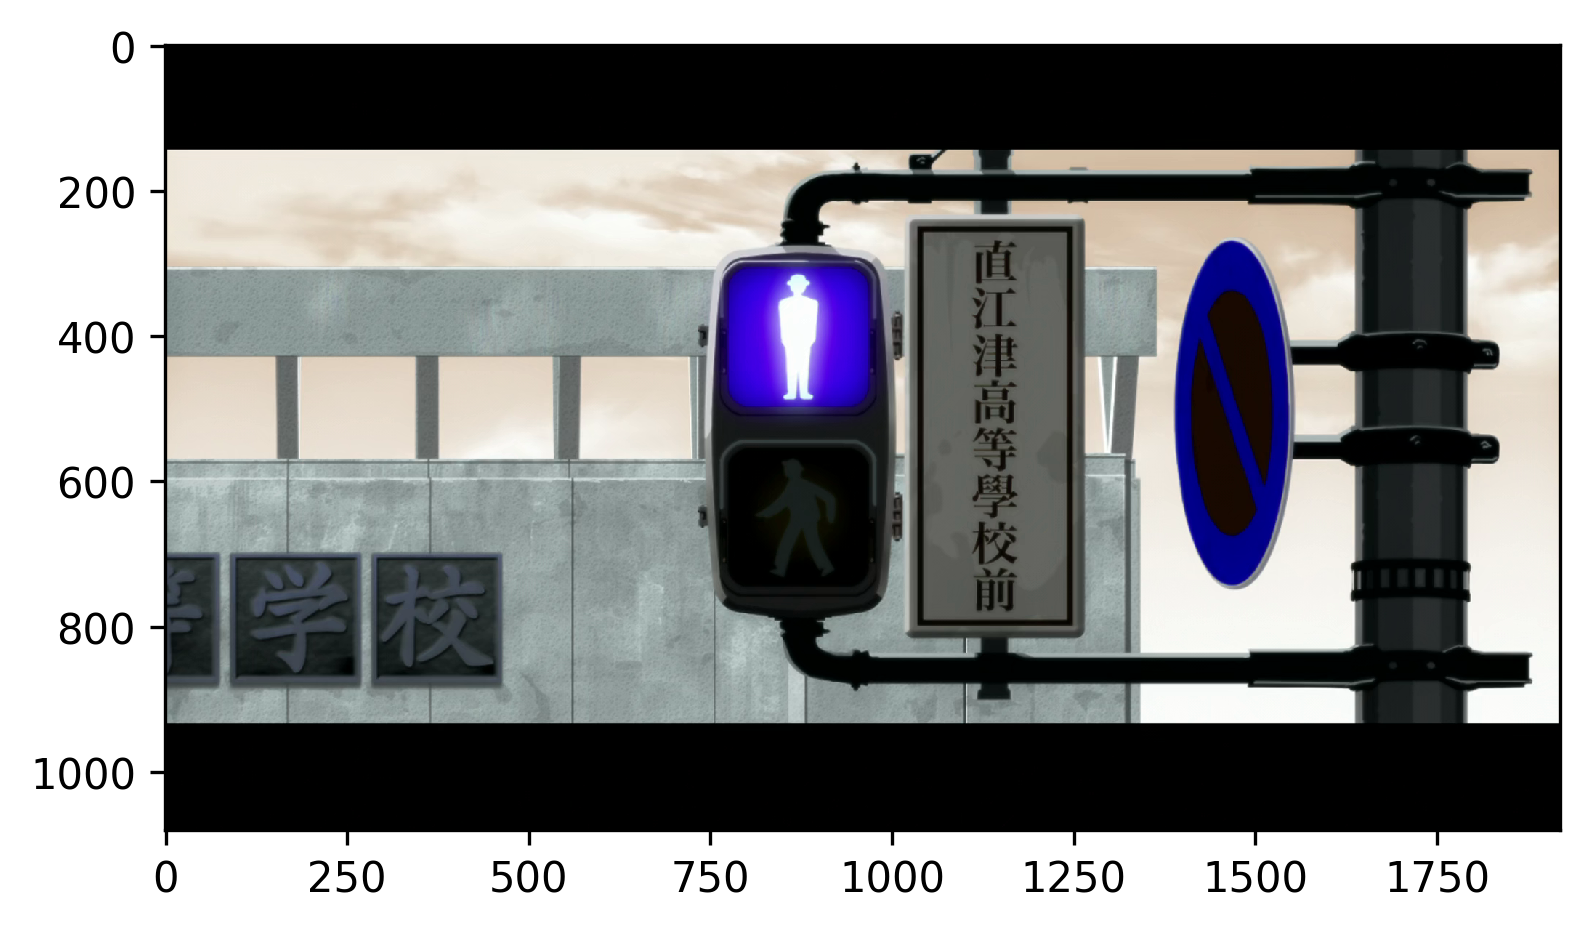

In [5]:
vc = cv2.VideoCapture(os.path.join(c.DIR, c.FILE))
_, frame = vc.read()
plt.imshow(frame)

In [8]:
not_text = [15e3, 120e3, 190e3, 500e3, 1100e3, 1300e3]
text = [16e3, 17e3, 18e3, 70e3]
big_image = None
frames = []
data_formats = []
for pos_msec in itertools.chain(not_text, text):
    vc.set(cv2.CAP_PROP_POS_MSEC, pos_msec)
    success, image = vc.read()
    assert success
    frames.append(image)
    data_formats.append(cv2.CAP_PROP_XI_IMAGE_DATA_FORMAT)
    if big_image is None:
        big_image = image
    else:
        big_image = np.concatenate((big_image, image))

In [ ]:
def apply_filter(original_frames, conversion_fn):
    return list(map(conversion_fn, original_frames))

In [10]:
yuv = list(map(rgb2yuv, frames))

In [10]:
var = list(map(ndimage.variance, frames))

In [6]:
def calc_variance(frames: Sequence[Image]):
    for frame in frames:
        print(variance(frame))

In [13]:
for thing in dir(cv2):
    if thing.startswith('CAP_PROP_'):
        print(thing)
        
# vc.set(prop, value)
# vc.get(prop)

CAP_PROP_APERTURE
CAP_PROP_AUTOFOCUS
CAP_PROP_AUTO_EXPOSURE
CAP_PROP_BACKLIGHT
CAP_PROP_BRIGHTNESS
CAP_PROP_BUFFERSIZE
CAP_PROP_CONTRAST
CAP_PROP_CONVERT_RGB
CAP_PROP_DC1394_MAX
CAP_PROP_DC1394_MODE_AUTO
CAP_PROP_DC1394_MODE_MANUAL
CAP_PROP_DC1394_MODE_ONE_PUSH_AUTO
CAP_PROP_DC1394_OFF
CAP_PROP_EXPOSURE
CAP_PROP_EXPOSUREPROGRAM
CAP_PROP_FOCUS
CAP_PROP_FORMAT
CAP_PROP_FOURCC
CAP_PROP_FPS
CAP_PROP_FRAME_COUNT
CAP_PROP_FRAME_HEIGHT
CAP_PROP_FRAME_WIDTH
CAP_PROP_GAIN
CAP_PROP_GAMMA
CAP_PROP_GIGA_FRAME_HEIGH_MAX
CAP_PROP_GIGA_FRAME_OFFSET_X
CAP_PROP_GIGA_FRAME_OFFSET_Y
CAP_PROP_GIGA_FRAME_SENS_HEIGH
CAP_PROP_GIGA_FRAME_SENS_WIDTH
CAP_PROP_GIGA_FRAME_WIDTH_MAX
CAP_PROP_GPHOTO2_COLLECT_MSGS
CAP_PROP_GPHOTO2_FLUSH_MSGS
CAP_PROP_GPHOTO2_PREVIEW
CAP_PROP_GPHOTO2_RELOAD_CONFIG
CAP_PROP_GPHOTO2_RELOAD_ON_CHANGE
CAP_PROP_GPHOTO2_WIDGET_ENUMERATE
CAP_PROP_GSTREAMER_QUEUE_LENGTH
CAP_PROP_GUID
CAP_PROP_HUE
CAP_PROP_IMAGES_BASE
CAP_PROP_IMAGES_LAST
CAP_PROP_INTELPERC_DEPTH_CONFIDENCE_THRESHOLD
CAP_PROP

In [9]:
## original frames
calc_variance(frames)

9412.260313758534
6231.67620645253
7788.999677312183
6178.7394626750975
436.74132408353995
2721.3083101685747
2575.9450710787537
11842.077576214793
11780.576770106942
8119.594702337454


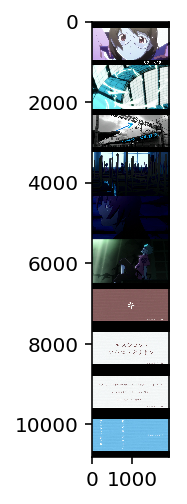

In [15]:
plt.imshow(big_image)

In [15]:
crop = round(vc.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.14)
cropped = list(map(lambda img: img[crop:-crop, :, :], frames))

In [19]:
grayed = list(map(rgb2gray, cropped))
hsv = list(map(rgb2hsv, cropped))
yuv = list(map(rgb2yuv, cropped))

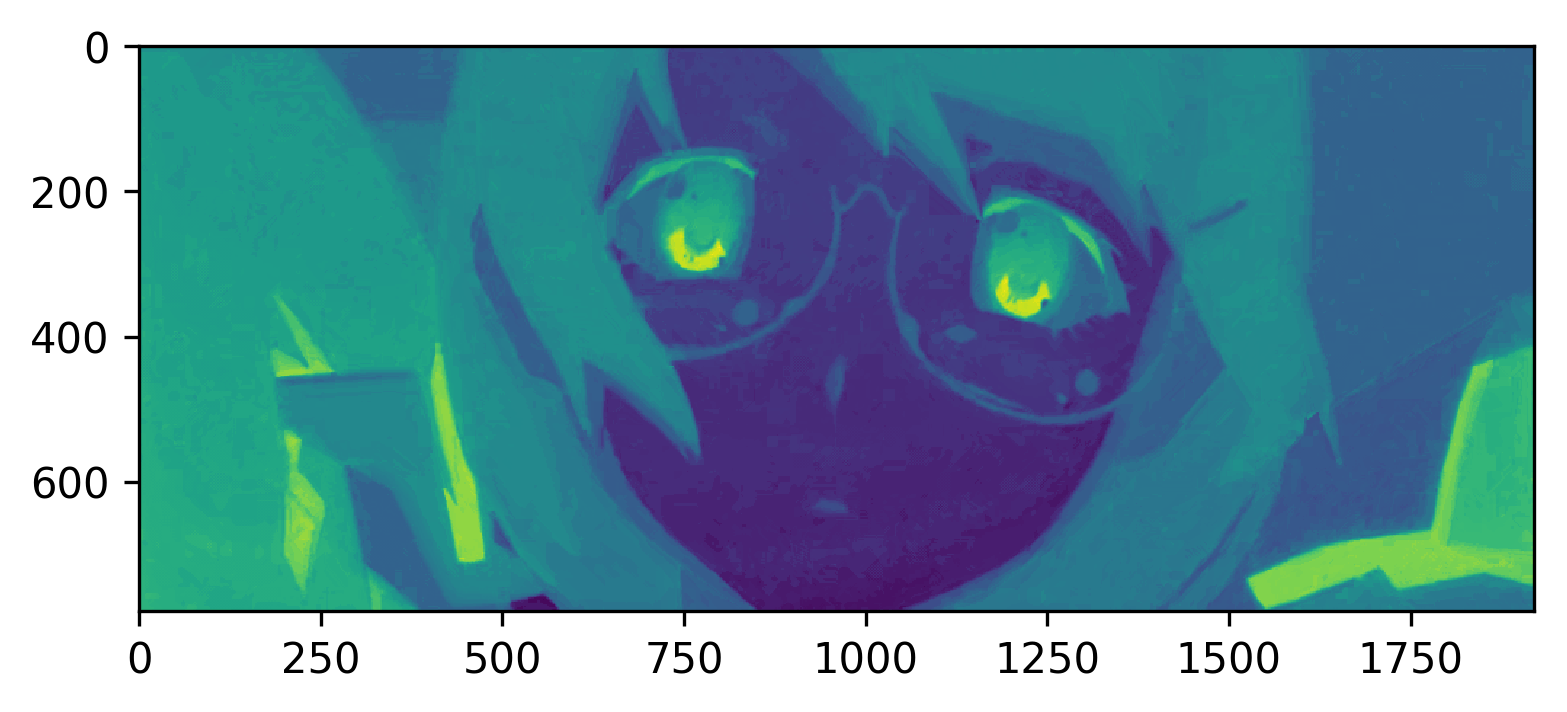

In [32]:
plt.imshow(yuv[0][:,:,2])

In [29]:
var = list(map(lambda img: ndimage.variance(img[:,:,2]), yuv))

In [30]:
var

[0.0011218423798978066,
 0.011217448753729379,
 0.0027848128827547766,
 0.0010767867217872033,
 0.00024674385355178405,
 0.0008991835864885993,
 5.897859788779087e-05,
 0.00020075360059271992,
 7.692793004449348e-05,
 0.0003028657515958295]

In [41]:
blurred_gray = list(map(lambda img: cv2.GaussianBlur(img, (5,5), 0), grayed))

In [38]:
blurred_original = list(map(lambda img: cv2.GaussianBlur(img, (5,5), 0), frames))

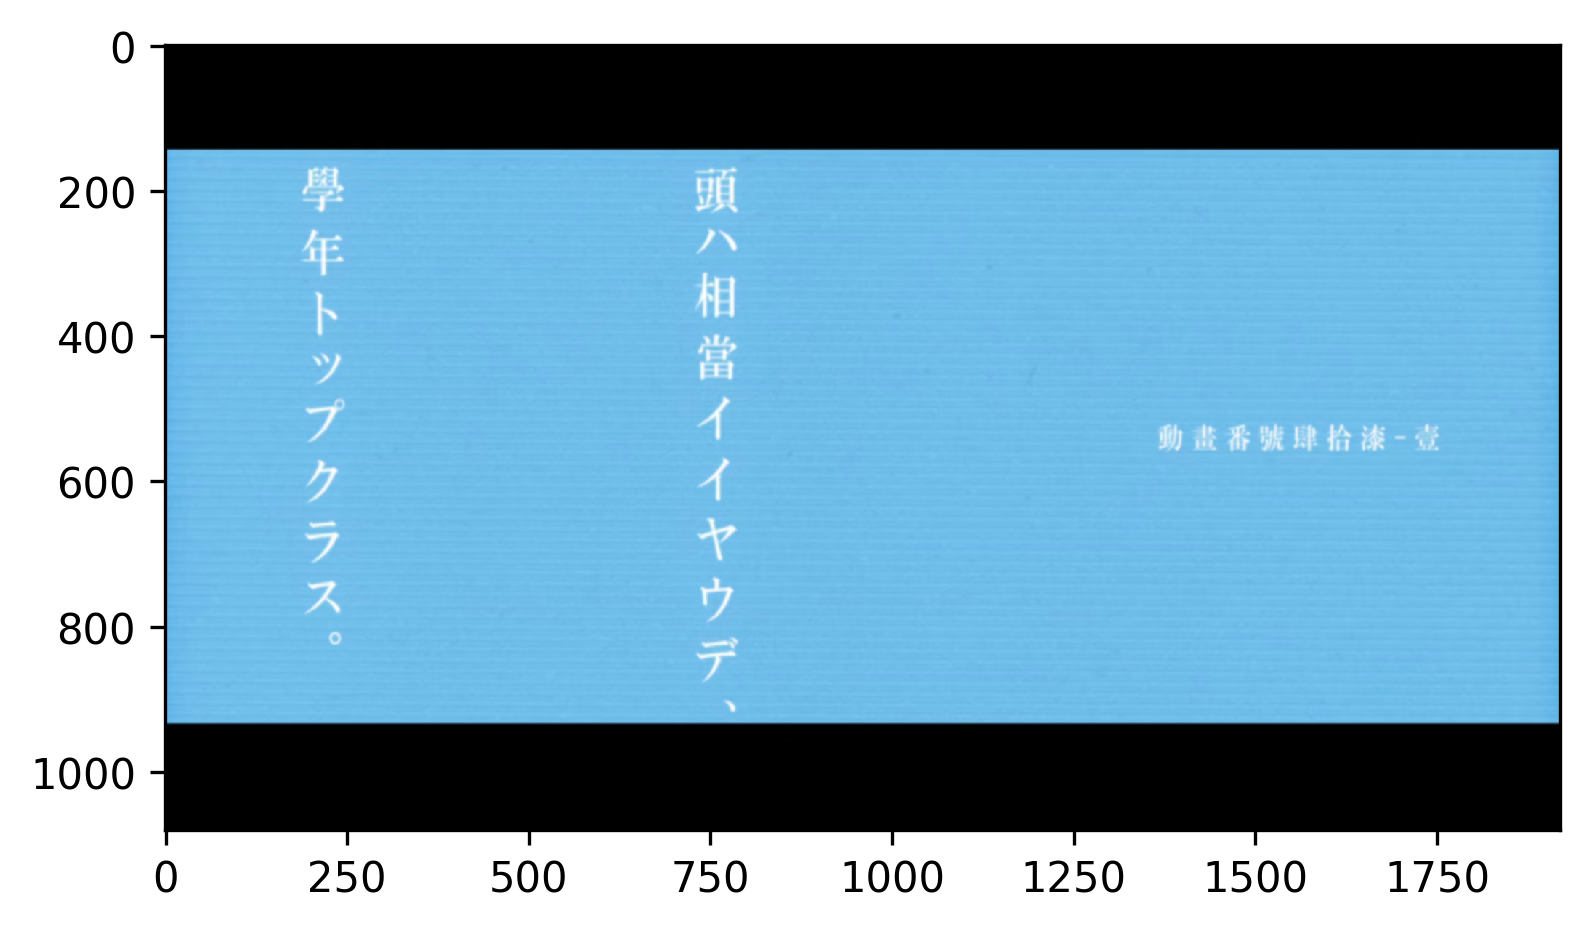

In [39]:
plt.imshow(blurred_original[-1])

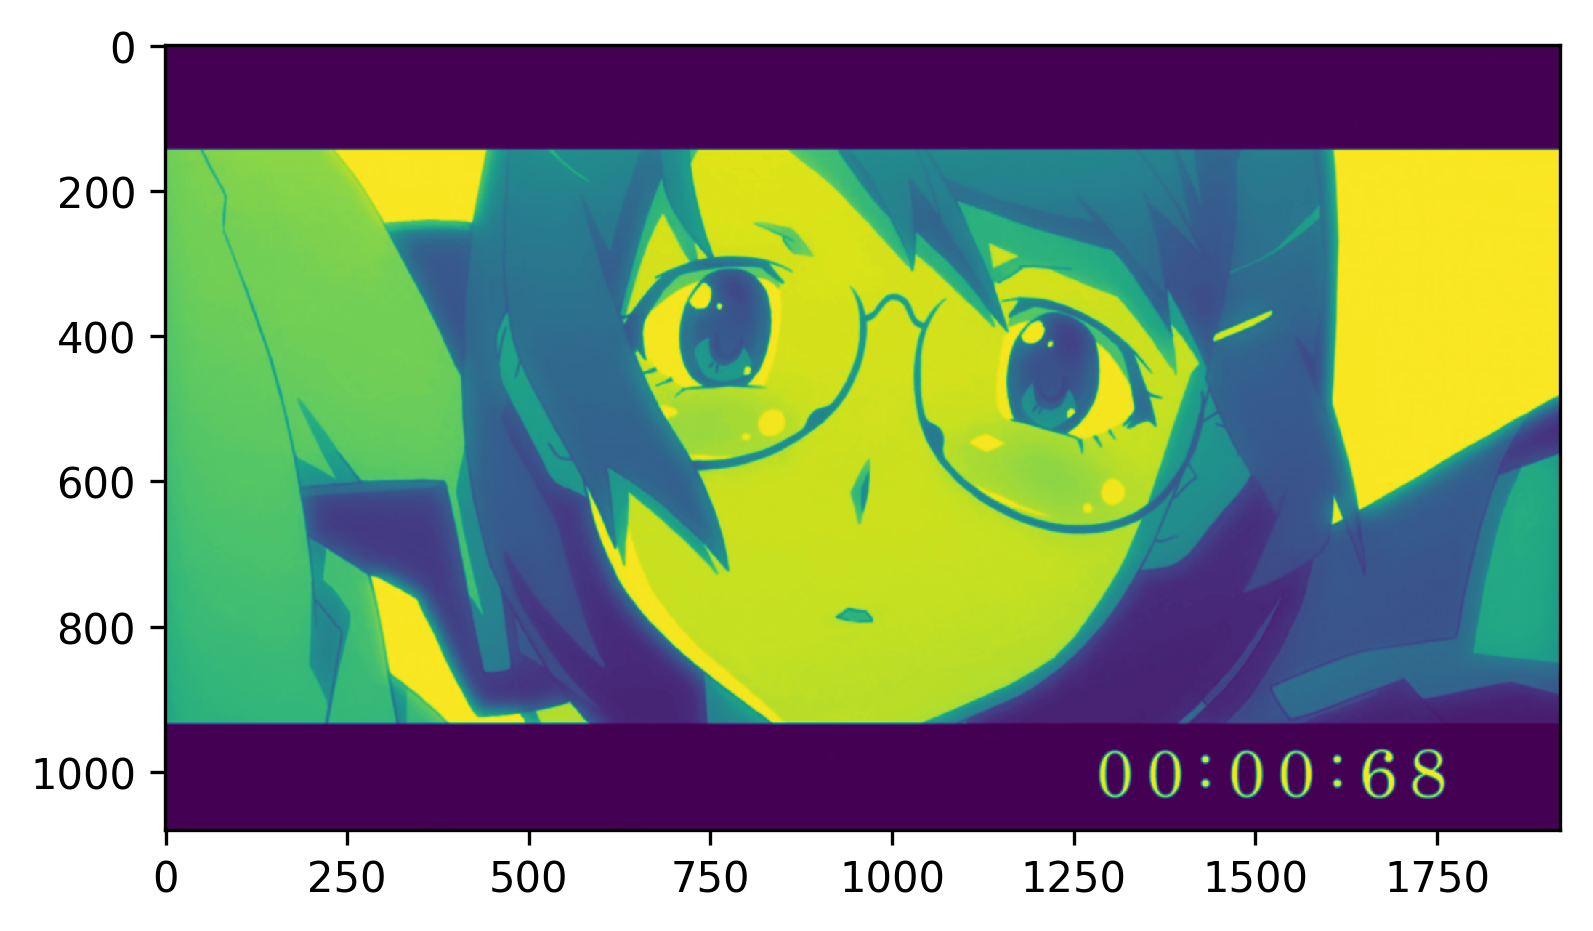

In [50]:
plt.imshow(blurred_original[0][:,:,1])

In [51]:
cv2.GaussianBlur?

Docstring:
GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
.   @brief Blurs an image using a Gaussian filter.
.   
.   The function convolves the source image with the specified Gaussian kernel. In-place filtering is
.   supported.
.   
.   @param src input image; the image can have any number of channels, which are processed
.   independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
.   @param dst output image of the same size and type as src.
.   @param ksize Gaussian kernel size. ksize.width and ksize.height can differ but they both must be
.   positive and odd. Or, they can be zero's and then they are computed from sigma.
.   @param sigmaX Gaussian kernel standard deviation in X direction.
.   @param sigmaY Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be
.   equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height,
.   respectively (see #getGaussianKernel for 

In [ ]:
blurred_hsv = 